<a href="https://colab.research.google.com/github/ShyamDodway/TIMESERIESFORECASTINGUSINGPYTHON/blob/main/Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

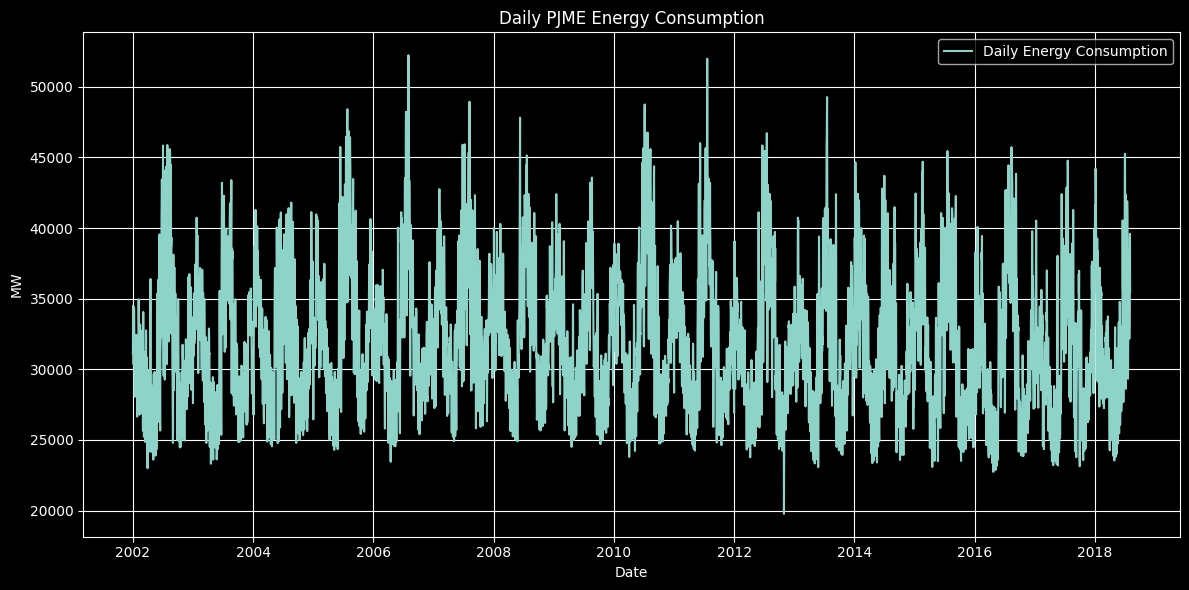

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("PJME_hourly.csv", parse_dates=['Datetime'])

# Set Datetime as index
df.set_index('Datetime', inplace=True)

# Resample to daily average
df_daily = df['PJME_MW'].resample('D').mean().dropna()

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(df_daily, label='Daily Energy Consumption')
plt.title('Daily PJME Energy Consumption')
plt.xlabel('Date')
plt.ylabel('MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


train test split

In [43]:
train = df_daily[:-30]  # all except last 30 days
test = df_daily[-30:]   # last 30 days


In [45]:
 #Step 3: Build & Fit SARIMA Model

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit(disp=False)


 Forecast & Evaluate

In [47]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Evaluate
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")


MAE: 2522.81
MAPE: 7.48%


Step 5: Plot Forecast vs Actual

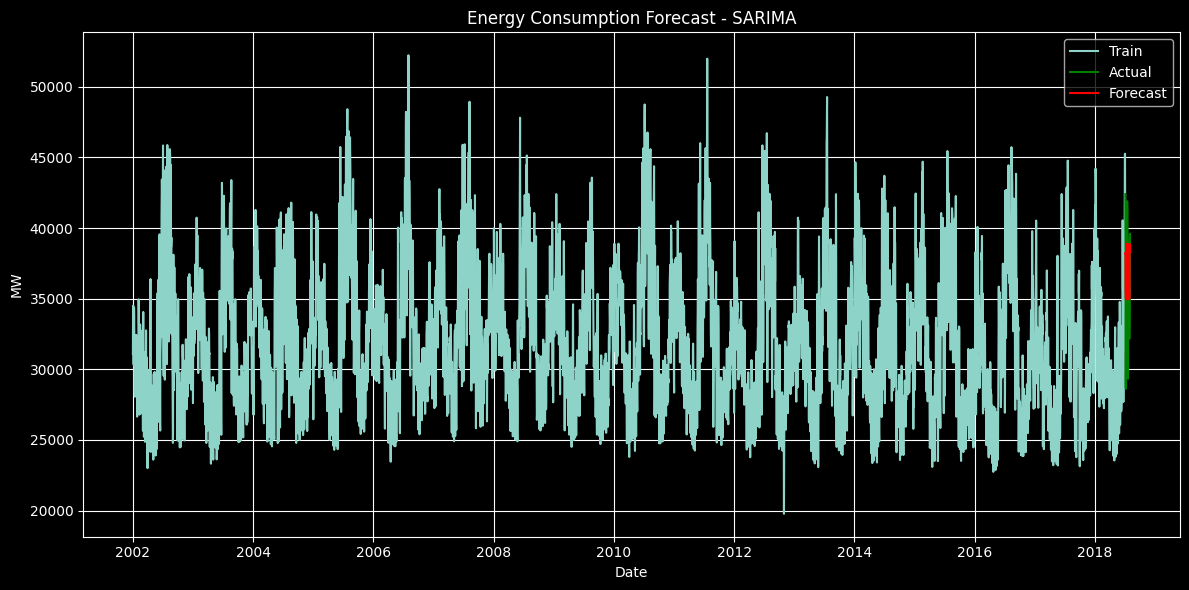

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Energy Consumption Forecast - SARIMA')
plt.xlabel('Date')
plt.ylabel('MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
